# Driver of LIM

## Import Modules

In [1]:
# import modules
import math
import numpy as np
import os

import matplotlib as mpl
mpl.rc('image', cmap='jet')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# %matplotlib inline

from lim_mod import LIM

## Data

In [2]:
# data
if False:
    # red noise
    from ode_AM_index_config import get_red_noise as get_data
    gamma = [0.06]
    true_t, true_y = get_data(gamma=gamma, data_size=10000)
else:
    # annular mode
    from read_AM_index_mod import get_AM_index as get_data
    t, y, p = get_data()

print(f't.shape = {t.shape}, y.shape = {y.shape}')

# test of the method for eigen decomposition
# from lim_mod import cal_Gt, test_eig_m
# Gt = cal_Gt(y, 5, la_method='scipy', verbose=True)
# test_eig_m(y, 5, la_method='scipy')

Reading from saved data ......
Use pressure levels = [   1.    2.    3.    5.    7.   10.   20.   30.   50.   70.  100.  125.
  150.  175.  200.  225.  250.  300.  350.  400.  450.  500.  550.  600.
  650.  700.  750.  775.  800.  825.  850.  875.  900.  925.  950.  975.
 1000.]

t.shape = (21535,), y.shape = (21535, 37)


## Model

rank of inverted matrix =14
diagonal(vrH_vr)=
[0.99999994 0.99999994 0.99999964 0.99999964 0.99999994 1.
 1.         1.0000001  1.0000001  0.99999994 0.99999976 0.99999976
 1.         1.         1.0000001  1.0000001  0.9999999  1.0000001
 1.0000001  1.         1.         1.         0.9999998  0.9999998
 1.         1.         1.0000001  1.0000001  1.0000002  1.0000002
 1.         1.         0.9999999  0.9999999  1.0000001  1.0000001
 0.99999994]
norm(vlH - vlH @ vr @vlH) = 0.5769591331481934
norm(vr - vr @ vlH @vr) = 0.1368277370929718
norm(a - vr @ diag(w) @vlH) = 0.008085852488875389
POP e-folding timescales =
 [23.28304    23.28304    19.848255   19.848255   12.275344    9.608886
  9.608886    7.606381    7.606381    6.830403    5.396624    5.396624
  4.161142    4.161142    0.5186407   0.5186407   0.4932648   0.4898979
  0.4898979   0.47228032  0.4878518   0.4878518   0.50575197  0.50575197
  0.39504096  0.40948194  0.44861698  0.44861698  0.50005233  0.50005233
  0.477616    0.4776

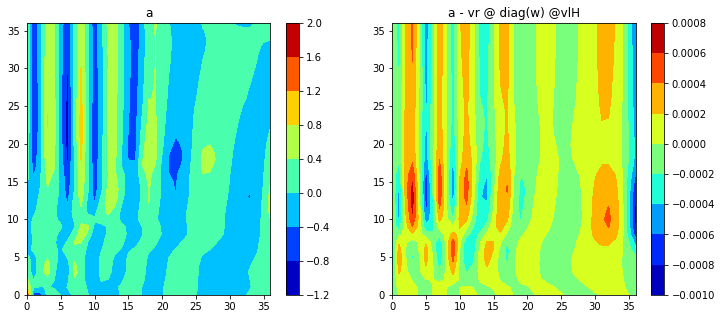

In [3]:
lag = 5
model = LIM(y, lag=lag, la_method='scipy', eig_method='eig2', verbose=True)

lag_time = 90
yf = model.forecast(y[:-lag_time], t[:lag_time+1])
print(f"\ny(t, x) ={y.shape}")
print(f"yf(lag, batch, x) = {yf.shape}")

## Plot the linear operator 

Ct = (37, 37)
Ctf = (37, 37)


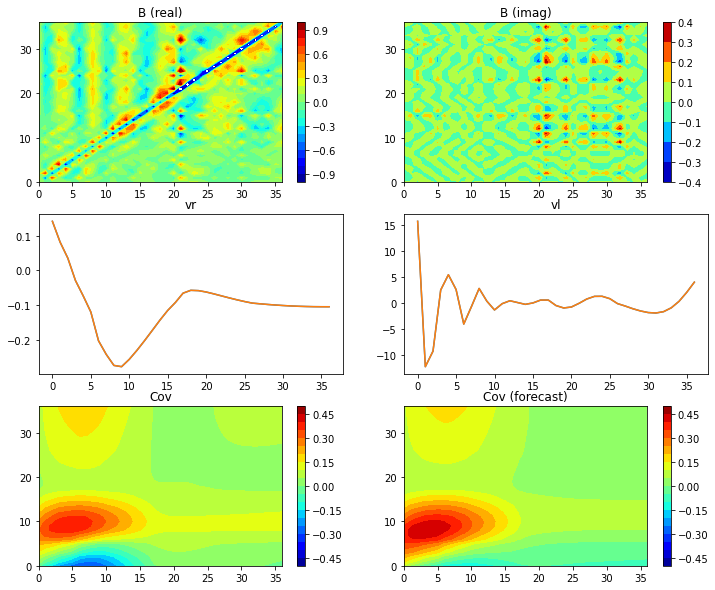

In [4]:
val_time = 30
Ct = y[val_time:].T @ y[:-val_time] / (len(y)-val_time)
Ctf = yf[val_time,:,:].T @ yf[0,:,:] / yf.shape[1]
print(f"Ct = {Ct.shape}")
print(f"Ctf = {Ctf.shape}")

fig = plt.figure(figsize=(12,10))
cmax = 1
ax = fig.add_subplot(3,2,1)
plt.contourf(model.B.real, np.linspace(-cmax, cmax, 21))
plt.title('B (real)')
plt.colorbar()

ax = fig.add_subplot(3,2,2)
plt.contourf(model.B.imag)
plt.title('B (imag)')
plt.colorbar()

ax = fig.add_subplot(3,2,3)
plt.plot(model.vr.real[:,:2])
plt.title('vr')

ax = fig.add_subplot(3,2,4)
plt.plot(model.vl.real[:,:2])
plt.title('vl')

cmax = 0.5
ax = fig.add_subplot(3,2,5)
plt.contourf(Ct, np.linspace(-cmax, cmax, 21))
plt.title('Cov')
plt.colorbar()

ax = fig.add_subplot(3,2,6)
plt.contourf(Ctf, np.linspace(-cmax, cmax, 21))
plt.title('Cov (forecast)')
plt.colorbar()

## Plot autocovariance

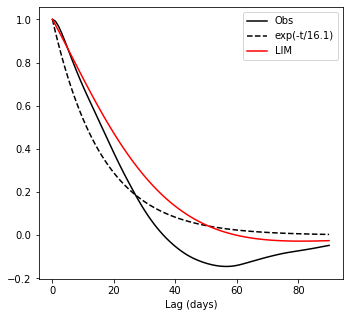

In [5]:
from plot_AM_index_mod import plot_cov

k = np.isin(p, 10).nonzero()[0][0]
plot_cov(y, yf=yf, k=k, lag_time=lag_time)


## Plot lagged covariance

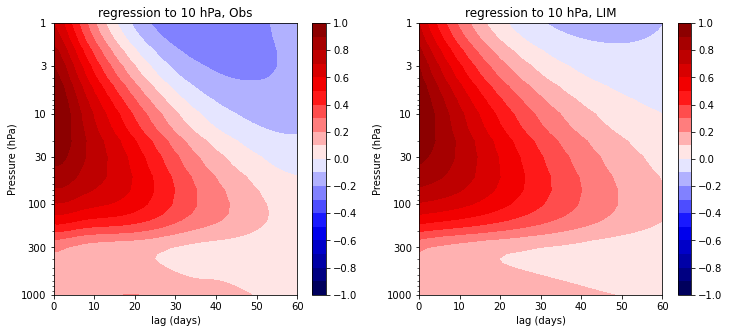

In [6]:
from plot_AM_index_mod import plot_lag_reg

plot_lag_reg(y, p, yf)

## Make composite for strong and weak vortex events


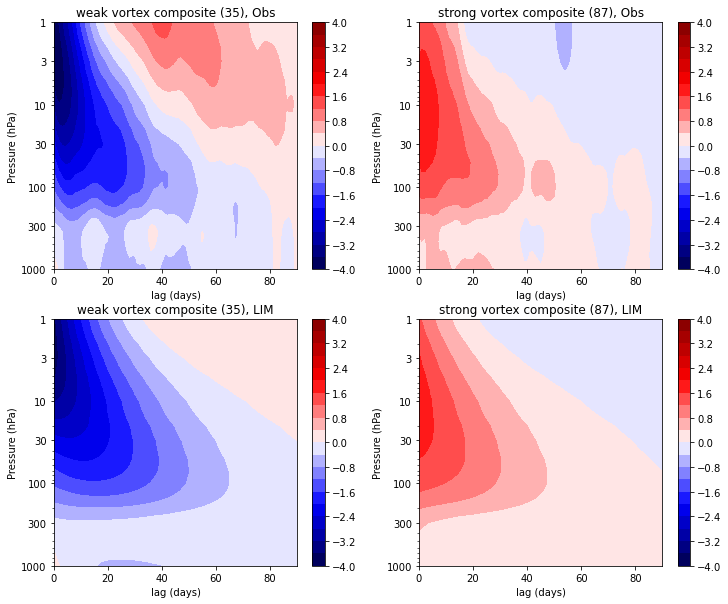

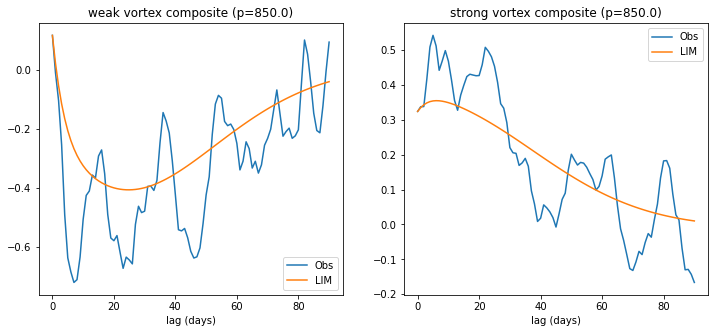

In [7]:
from plot_AM_index_mod import plot_event

plot_event(y, p, yf=yf, lag_time=lag_time)